Data Loading: Load the sales data into a Pandas DataFrame using NumPy and Pandas Libraries.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("C:\sales_data.csv")

#Now access the data in the dataframe 'df'
print(df.head(5))    #This will print first few rows of the dataframe


        Date      Store_type Product_category  Quantity      Revenue  \
0   8/8/2022  Shopping PLaza         Smart TV      49.0  2739.948652   
1  7/24/2022         Private         Smart TV      43.0  1679.149019   
2  8/16/2022  Shopping PLaza              NaN      18.0   882.511665   
3  3/12/2022            Mall              NaN      23.0  1511.998497   
4  4/16/2022         Private         Smart TV       NaN  4605.004648   

  Customer_Gender     Region  
0            Male        Goa  
1            Male        Goa  
2            Male        Goa  
3          Female        NaN  
4          Female  Hyderabad  


Determine the Missing Values in the Dataframe

In [15]:
missing_values=df.isnull()
print(missing_values)      #This will show a dataframe with True/False for missing values
#Show the count missing values per column
missing_values_count=df.isnull().sum()
print('Missing Values count per column:\n',missing_values_count)
#Show the Total count missing values in the Dataframe
total_missing_values=df.isnull().sum().sum()
print('Total Missing values count in the dataframe:',total_missing_values)



      Date  Store_type  Product_category  Quantity  Revenue  Customer_Gender  \
0    False       False             False     False    False            False   
1    False       False             False     False    False            False   
2    False       False              True     False    False            False   
3    False       False              True     False    False            False   
4    False       False             False      True    False            False   
..     ...         ...               ...       ...      ...              ...   
995  False       False             False     False    False            False   
996  False       False             False     False    False            False   
997  False       False             False     False    False            False   
998  False       False             False     False    False            False   
999  False       False             False     False    False            False   

     Region  
0     False  
1     False

Data Cleaning: Handle the missing values in the dataframe

In [26]:
#Replace the missing values in 'Quantity' column with its mean
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].mean())

#Replace the missing values in 'Revenue' column with its mean
df['Revenue'] = df['Revenue'].fillna(df['Revenue'].mean())

#Replace the missing values in 'ProductID' column with its mode
df['Product_category'] = df['Product_category'].fillna(df['Product_category'].mode()[0])

#Replace the missing values in 'Region' column with its mode
df['Region'] = df['Region'].fillna(df['Region'].mode()[0])

#Display the dataframe after data cleaning
print(df.head(5))



        Date      Store_type Product_category   Quantity      Revenue  \
0 2022-08-08  Shopping PLaza         Smart TV  49.000000  2739.948652   
1 2022-07-24         Private         Smart TV  43.000000  1679.149019   
2 2022-08-16  Shopping PLaza         Smart TV  18.000000   882.511665   
3 2022-03-12            Mall         Smart TV  23.000000  1511.998497   
4 2022-04-16         Private         Smart TV  25.554082  4605.004648   

  Customer_Gender     Region  
0            Male        Goa  
1            Male        Goa  
2            Male        Goa  
3          Female  Hyderabad  
4          Female  Hyderabad  


Exploratory Data Analysis (EDA): Use Matplotlib to visualize various aspects of the sales data, including:-

Monthly sales trends.

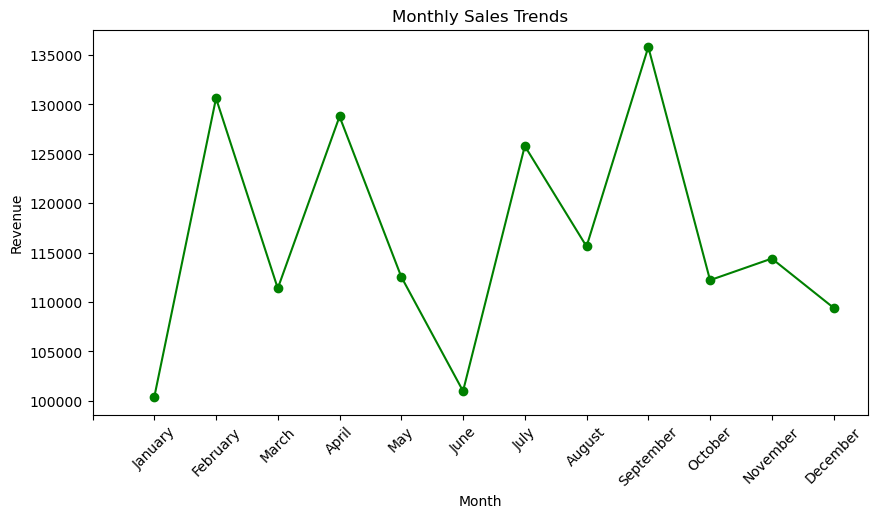

In [17]:
import calendar
df['Date'] = pd.to_datetime(df['Date'])
monthly_sales = df.groupby(df['Date'].dt.month)['Revenue'].sum()
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='line',marker='o',color='green')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(np.arange(13), [calendar.month_name[i] for i in range(0, 13)], rotation=45)
plt.show()



Distribution of revenue by product category.

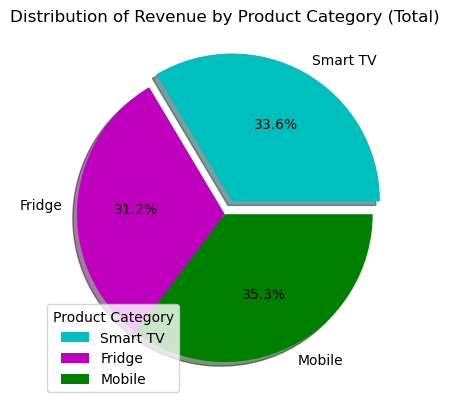

In [18]:
product_categories = df['Product_category'].unique()  # Get unique product categories
total_revenue_per_category = df.groupby('Product_category')['Revenue'].sum()  # Calculate total revenue per category

# Create the pie chart
myexplode = [0.1, 0, 0]
plt.pie(total_revenue_per_category, labels=product_categories, autopct="%1.1f%%",colors=['c','m','g'],explode=myexplode,shadow=True)  # Adjust format string for percentages

# Customize the chart
plt.title("Distribution of Revenue by Product Category (Total)")
plt.legend(title="Product Category",loc='lower left')  # Add legend

# Display the chart
plt.show()


Relationship between sales revenue and quantity sold.

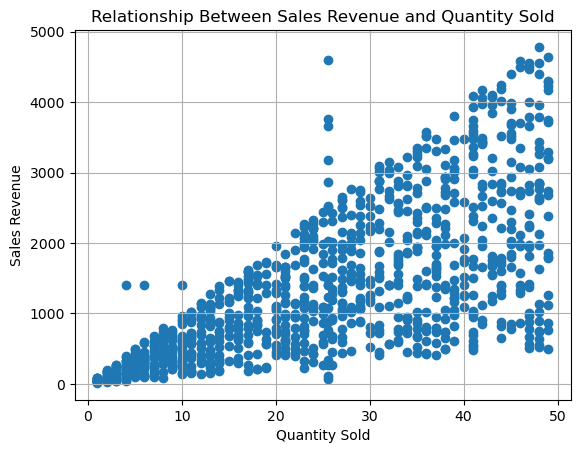

In [19]:
# Create the scatter plot
plt.scatter(df['Quantity'], df['Revenue'])

# Customize the chart for better readability
plt.xlabel("Quantity Sold")
plt.ylabel("Sales Revenue")
plt.title("Relationship Between Sales Revenue and Quantity Sold")
plt.grid(True)  # Add gridlines

# Display the chart
plt.show()

Geographic distribution of sales across regions.

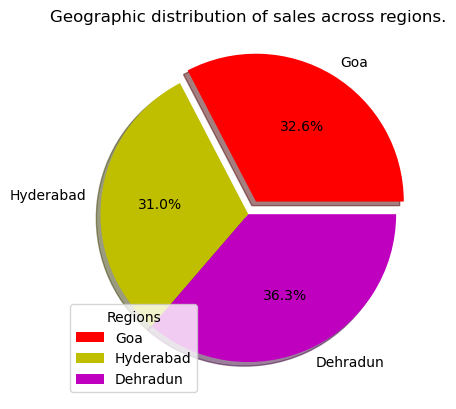

In [20]:
Regions = df['Region'].unique()  # Get unique Region
total_sales_per_region = df.groupby('Region')['Quantity'].sum()  # Calculate total Sales per Region

# Create the pie chart
myexplode = [0.1, 0, 0]
plt.pie(total_sales_per_region, labels=Regions, autopct="%1.1f%%",colors=['r','y','m'],shadow = True,explode=myexplode)  # Adjust format string for percentages

# Customize the chart
plt.title("Geographic distribution of sales across regions.")
plt.legend(title="Regions",loc='lower left')  # Add legend

# Display the chart
plt.show()

Customer demographics

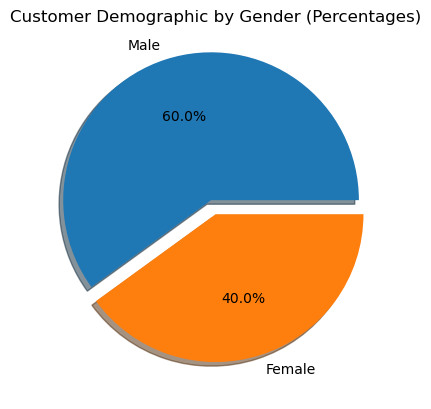

In [21]:
# Count customers by gender
customer_count_by_gender = df['Customer_Gender'].value_counts()

# Calculate total customers
total_customers = len(df)

# Calculate percentages
gender_percentages = [ (count / total_customers) * 100 for count in customer_count_by_gender.values ]

# Create the pie chart
myexplode=[0.1,0]
plt.pie(gender_percentages, labels=customer_count_by_gender.index, autopct="%1.1f%%",shadow = True,explode=myexplode)  # Adjust format string for percentages

# Customize the chart for better readability (optional)
plt.title("Customer Demographic by Gender (Percentages)")

# Display the chart
plt.show()


Purchasing behavior

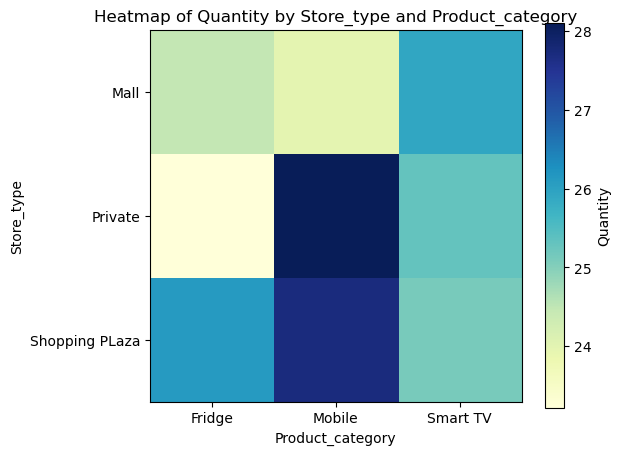

In [22]:

# Choose attributes for heatmap (replace as needed)
attribute1 = 'Store_type'
attribute2 = 'Product_category'
purchase_metric = 'Quantity'

# Create a pivot table to summarize quantity by categories
pivot_table = pd.pivot_table(df, values=purchase_metric, index=[attribute1], columns=[attribute2])

# Create the heatmap
plt.figure(figsize=(6, 5))  # Adjust figure size as desired
plt.imshow(pivot_table, cmap='YlGnBu')  # Choose a colormap (YlGnBu represents low to high values)
plt.colorbar(label=purchase_metric)  # Add a colorbar legend

# Set labels for axes
plt.xlabel(attribute2)
plt.ylabel(attribute1)


# Set ticks (optional)
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns, rotation=0)  # Rotate x-axis labels if needed
plt.yticks(range(len(pivot_table.index)), pivot_table.index)

# Display the chart
plt.title(f"Heatmap of {purchase_metric} by {attribute1} and {attribute2}")
plt.show()



Statistical Analysis: Calculate descriptive statistics (mean, median, standard deviation, etc.) for key variables to understand the central tendencies and variability in the data.

In [23]:
# Descriptive statistics for all numeric columns
# Select only numeric columns (optional)
numeric_cols = ['Quantity', 'Revenue']  # Replace with your desired numeric columns
df_numeric = df[numeric_cols]

# Descriptive statistics for selected numeric columns
print("Descriptive Statistics:")
for col in numeric_cols:
  # Get summary statistics for each column
  summary = df_numeric[col].describe()
  
  # Print column name and relevant statistics (mean, median, std, min, max)
  print(f"\tColumn: {col}")
  print(f"\t\tMean: {summary['mean']}")
  print(f"\t\tMedian: {summary['50%']}")  # Median is at the 50th percentile
  print(f"\t\tStd. Dev.: {summary['std']}")
  print(f"\t\tMin: {summary['min']}")
  print(f"\t\tMax: {summary['max']}")
  print("\n")  # Add a newline for better readability

Descriptive Statistics:
	Column: Quantity
		Mean: 25.554081632653062
		Median: 25.554081632653062
		Std. Dev.: 14.04497757451173
		Min: 1.0
		Max: 49.0


	Column: Revenue
		Mean: 1397.8339278830722
		Median: 1132.9602135
		Std. Dev.: 1068.7563323934728
		Min: 13.74755319
		Max: 4784.797574




Correlation Analysis: Determine correlations between different variables (e.g., revenue and quantity sold) using correlation coefficients and visualize them using scatter plots or heatmaps.

Correlation Matrix:
          Quantity   Revenue
Quantity  1.000000  0.692079
Revenue   0.692079  1.000000


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12364\909777277.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


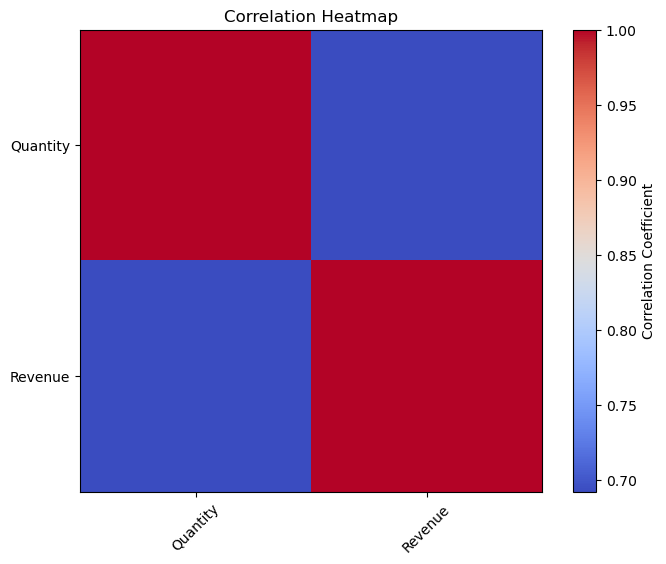

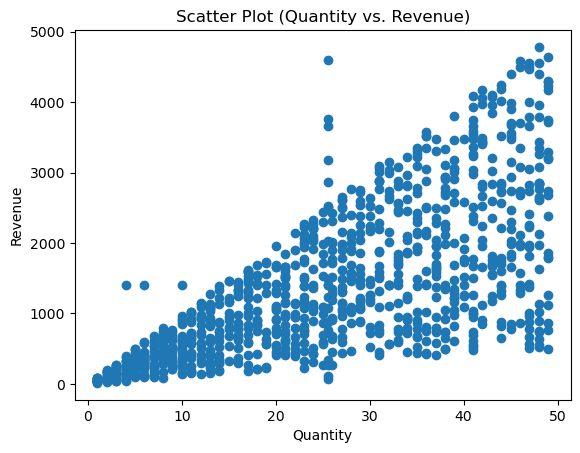

In [24]:
# Correlation coefficients
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)  # This displays the correlation coefficients between all numeric columns

# Heatmap visualization (optional)
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm')  # Choose a colormap (coolwarm for positive/negative correlations)
plt.colorbar(label='Correlation Coefficient')  # Add a colorbar legend

# Set labels for axes
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)  # Rotate x-axis labels
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Display the heatmap
plt.title("Correlation Heatmap")
plt.show()

# Scatter plot example (optional)
plt.scatter(df['Quantity'], df['Revenue'])  # Replace with desired variables for scatter plot
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.title('Scatter Plot (Quantity vs. Revenue)')
plt.show()

Insights Generation: Generate actionable insights from the analysis to help XYZ Retail make data-driven decisions. This may include identifying top-selling products, high-performing stores, and opportunities for growth.

In [25]:

# Top-selling products (by total revenue)
top_products = df.groupby('Product_category')['Revenue'].sum().sort_values(ascending=False).head(5)
print("Top 5 Selling Product Categories (by Total Revenue):\n")
print(top_products,"\n")
top_product_category = df.groupby('Product_category')['Revenue'].sum().idxmax()
highest_revenue = df.groupby('Product_category')['Revenue'].sum().max()



# High-performing stores (by average revenue)
avg_revenue_per_store = df.groupby('Store_type')['Revenue'].mean()
print("Average Revenue per Store Type:\n")
print(avg_revenue_per_store,"\n")
highest_revenue_store_type = avg_revenue_per_store.idxmax()  # Store type with highest average revenue
highest_revenue_value = avg_revenue_per_store.max()


# Additional Insights (based on correlation analysis and exploration)

# Example 1: Analyze correlation between quantity sold and revenue
quantity_revenue_correlation = df['Quantity'].corr(df['Revenue'])
if quantity_revenue_correlation > 0.5:  # Adjust threshold based on your analysis
  print("\nThere's a positive correlation between quantity sold and revenue. This suggests focusing on strategies to increase sales volume.\n")
else:
  print("\nThe correlation between quantity sold and revenue is weak. Consider exploring other factors that might influence revenue.\n")

# Example 2: Identify potential for growth in specific product categories

growth_potential_categories = top_products.index[1:2]  # Assuming top and second-ranked categories have growth potential
print(f"\nPotential growth opportunities exist in product category:\n {', '.join(growth_potential_categories)}")

print(f"\nStore Type with Highest Average Revenue: {highest_revenue_store_type} (Average Revenue: {highest_revenue_value:.2f})\n")
print(f"Therefore the Company should focus the most on {highest_revenue_store_type} as it is the heavy hitter for the company.\n It is advisable that if the company ever decides to take a risk and Release a new product in these store type, the chances of loss would be low.")


print(f"\nProduct Category with Highest Total Revenue: {top_product_category} (Total Revenue: {highest_revenue:.2f})\n")
print(f"Therefore it is advisable that the company focuses on keeping the latest models of {top_product_category} in stores as these are highest revenue generators.")


Top 5 Selling Product Categories (by Total Revenue):

Product_category
Smart TV    493204.485141
Fridge      469002.478840
Mobile      435626.963902
Name: Revenue, dtype: float64 

Average Revenue per Store Type:

Store_type
Mall              1346.168551
Private           1321.913838
Shopping PLaza    1517.280131
Name: Revenue, dtype: float64 


There's a positive correlation between quantity sold and revenue. This suggests focusing on strategies to increase sales volume.


Potential growth opportunities exist in product category:
 Fridge

Store Type with Highest Average Revenue: Shopping PLaza (Average Revenue: 1517.28)

Therefore the Company should focus the most on Shopping PLaza as it is the heavy hitter for the company.
 It is advisable that if the company ever decides to take a risk and Release a new product in these store type, the chances of loss would be low.

Product Category with Highest Total Revenue: Smart TV (Total Revenue: 493204.49)

Therefore it is advisable that the c